<a href="https://colab.research.google.com/github/Aisha-Hagar/Machine_Learning/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [19]:
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Load Data**

In [20]:
url = 'https://raw.githubusercontent.com/ELSOUDY2030/Mall-Customers/main/Mall_Customers.csv'
data = requests.get(url).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')))
print (df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# **EDA**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are no null values.

In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
#Drop CustomerID and Gender columns as they won't be used in kmeans clustering
filtered_df = df.drop(['CustomerID','Gender'], axis=1)

In [24]:
filtered_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


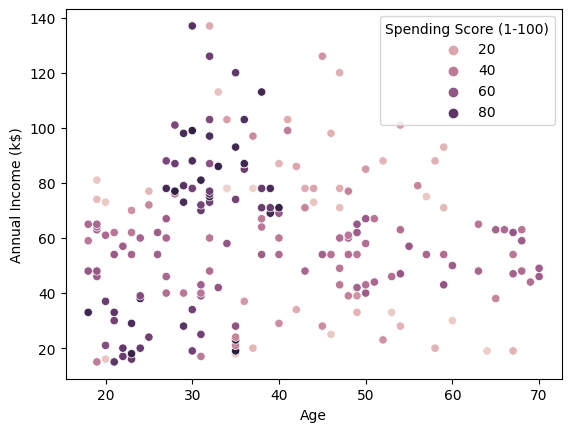

In [25]:
#Plot Age against Annual Income to visually check if kmeans clustering is a good approach.
sns.scatterplot(data = filtered_df, x = 'Age', y = 'Annual Income (k$)', hue = 'Spending Score (1-100)')
plt.show()

# **K-means Clustering**

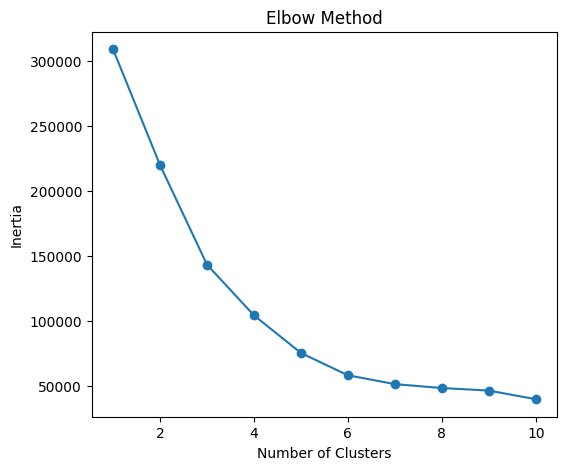

In [26]:
#Use elbow method to determine the optimal number of clusters
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init= 'auto', random_state=42)
    kmeans.fit(filtered_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

From the figure above the optimal number of clusters is 5.

In [27]:
#Fit the data to kmeans model with 5 clusters.
kmeans = KMeans(n_clusters=5, n_init= 'auto', random_state=42)
kmeans.fit(filtered_df)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [28]:
#Add the clusetrs as a column to the data
filtered_df['Cluster'] = kmeans.labels_

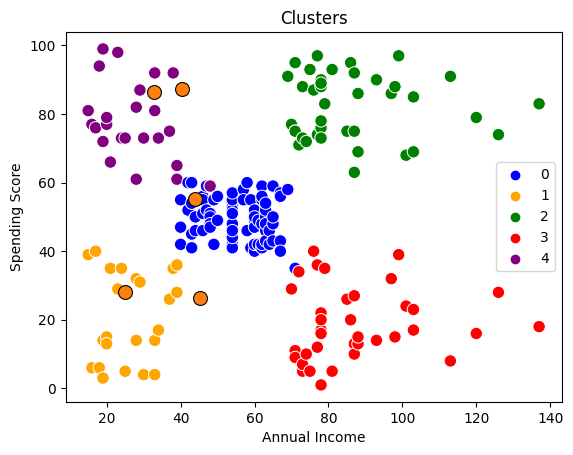

In [29]:
#Plot the clusters in 2d by using the features 'Annual Income (k$)' and 'Spending Score (1-100) and showing the clusters centroids'
palette = ['blue', 'orange', 'green', 'red', 'purple']
ax = sns.scatterplot(data = filtered_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=filtered_df['Cluster'], palette=palette, s=80)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, ec='black', ax=ax)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.show()

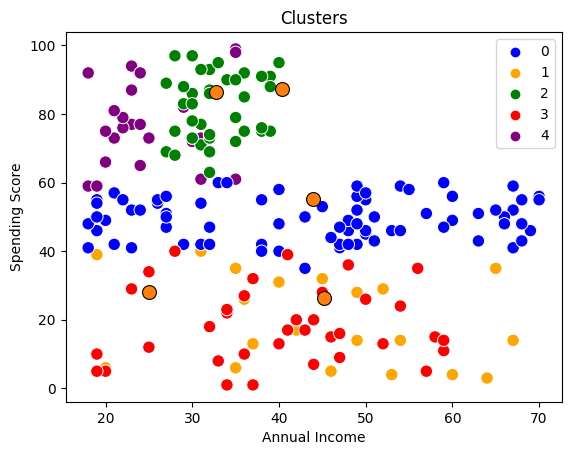

In [30]:
ax=sns.scatterplot(data = filtered_df, x='Age', y='Spending Score (1-100)', hue=filtered_df['Cluster'], palette=palette, s=80)
ax = sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, ec='black', ax=ax)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.show()

Since we have 3 features 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)', it is better to plot the clusters in 3d to show all the information.

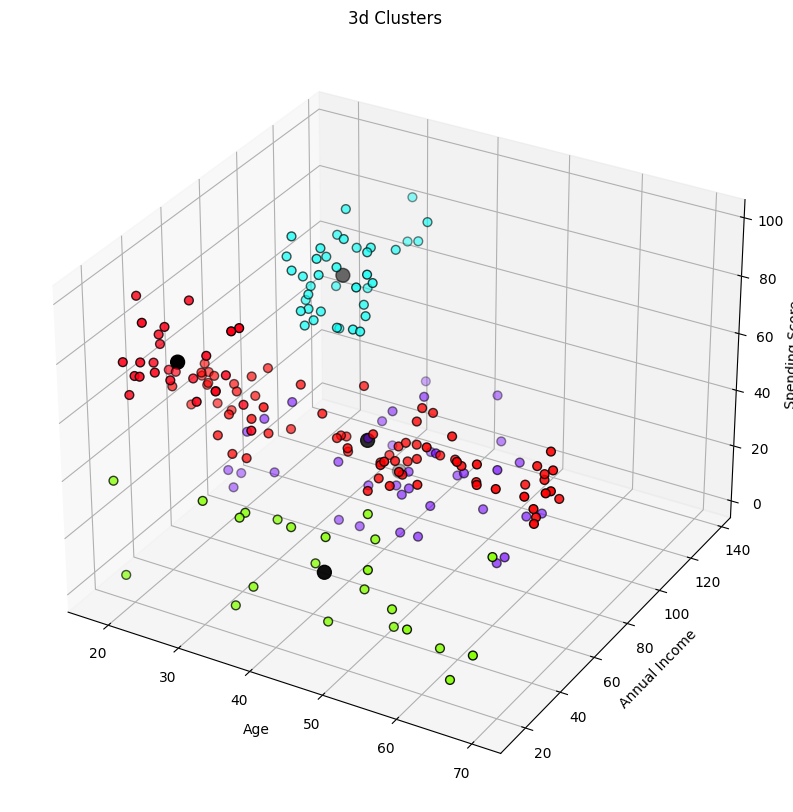

In [31]:
#Plot clusters and centroids in 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filtered_df['Age'], filtered_df['Annual Income (k$)'], filtered_df['Spending Score (1-100)'] ,c=filtered_df['Cluster'], cmap='hsv', edgecolor='k', s=40)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 100, c = 'black', label = 'Centroid')
ax.set_title("3d Clusters")
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()